In [91]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2.5, rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote/'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results/'

output_directory = WRITE_DIRECTORY_ROOT + 'kaggle_home_credit/execution_time/different_workloads.pdf'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [92]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/different_workloads/kaggle_home_credit/cloud-41'
result_file = result_folder + '/2019-10-01.csv'

In [93]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload','type', 'mat_rate',
    'run_time'
]
execution_order = {'start_here_a_gentle_introduction':0,
                   'introduction_to_manual_feature_engineering':0,
                   'introduction_to_manual_feature_engineering_p2':0,
                   'fork_cridata_start_here_a_gentle_introduction':1,
                   'fork_taozhongxiao_start_here_a_gentle_introduction':2
                  }
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)
execution_times['workload_order'] = execution_times['workload'].replace(execution_order)
execution_times = execution_times[execution_times['workload_order'] > 0]
execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id','type'])['run_time'].apply(lambda x: x.cumsum())
#execution_times['workload_order'] = execution_times['workload'].replace(execution_order)


In [94]:
def plot_executions_reuse(df, loc=''):
    plt.figure(figsize=(6,4))
    plot = sns.lineplot(
        data=df,
        x='workload_order',
        y='cumulative_run_time',
        hue='type',
        style='type',
        markers=["^", "o"],
        lw=3,
        hue_order=['baseline', 'optimized'],
       # style_order = ['baseline', 'optimized'],
        dashes=[(2, 2), (1, 0)],
        palette={
            'optimized': SYSTEM_COLOR,
            'baseline': BASELINE_COLOR
        },
        legend='full')

    legend = plot.legend()
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    #top = df['run_time'].max()
    #cat.set_axis_labels('Execution Number', 'Run Time (s)')
    plot.set_xlabel('Workload', fontsize=22)
    plot.set_ylabel('Cumulative Run Time (s)', fontsize=22)
    #plot.set_xlim((1,2))
    plot.set_ylim((0,500))
    plot.set_xticks(range(1,3))
    plot.set_xticklabels([1,2])
    plt.tight_layout()
    plt.savefig(loc)

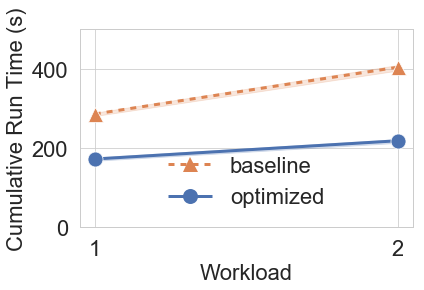

In [95]:
plot_executions_reuse(execution_times, output_directory)

In [57]:
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)
execution_times['workload_order'] = execution_times['workload'].replace(execution_order)

In [62]:
execution_times[execution_times['workload_order'] == 0]['run_time'] = 0

In [64]:
execution_times.run_time[execution_times.workload_order == 0] =0

In [65]:
execution_times


,timestamp,exp_id,repo,workload,type,mat_rate,run_time,workload_order
0,01:12:46,FF7CC74F,kaggle_home_credit,start_here_a_gentle_introduction,optimized,33554432.0,0.000000,0
1,01:12:46,FF7CC74F,kaggle_home_credit,introduction_to_manual_feature_engineering,optimized,33554432.0,0.000000,0
2,01:12:46,FF7CC74F,kaggle_home_credit,introduction_to_manual_feature_engineering_p2,optimized,33554432.0,0.000000,0
3,11:00:54,FF7CC74F,kaggle_home_credit,fork_cridata_start_here_a_gentle_introduction,optimized,33554432.0,50.008426,1
4,11:00:54,FF7CC74F,kaggle_home_credit,fork_taozhongxiao_start_here_a_gentle_introduc...,optimized,33554432.0,46.833167,2
5,01:54:48,D7303855,kaggle_home_credit,start_here_a_gentle_introduction,baseline,0.0,0.000000,0
6,01:54:48,D7303855,kaggle_home_credit,introduction_to_manual_feature_engineering,baseline,0.0,0.000000,0
7,01:54:48,D7303855,kaggle_home_credit,introduction_to_manual_feature_engineering_p2,baseline,0.0,0.000000,0
8,01:54:48,D7303855,kaggle_home_credit,fork_cridata_start_here_a_gentle_introduction,baseline,0.0,289.355419,1
9,01:54:48,D7303855,kaggle_home_credit,fork_taozhongxiao_start_here_a_gentle_introduc...,baseline,0.0,120.574684,2
